# **Introduction**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

data = np.load('digits389.npy', allow_pickle = True).item()

In [ ]:
list(data)

X_test = list(data.values())[0]
X_train = list(data.values())[1]
Y_test = list(data.values())[2]
Y_train = list(data.values())[3]

# **Part a)**

In [ ]:
def LDAFeature(X, Y):
  '''
  Function to conduct dimensionality reduction using LDA. The n data points are
  projected on the (k-1) generalized eigenvectors with largest eigenvalues
  leading to a new matrix Z (n*k-1)

  input: 
  - design matrix (nxd)
  - label vector Y (nx1)

  output: 
  - W (dxk-1) containing the k-1 d-dimensional generalized eigenvectors
  - Z (nxk-1) containing the points in X projected on the generalized eigenvectors W

  '''

  # determine dimensions
  n = X.shape[0]
  d = X.shape[1]
  classes = np.unique(Y)
  k = len(classes)

  # initialize covariance matrices
  C_B = np.zeros((d, d))
  C_W = np.zeros((d, d))

  # compute overall mean per feature
  total_mean = np.mean(X, axis = 0)

  # iterate through classes
  for i in range(k):
    cl = classes[i]
    data_class = X[Y == cl] # select data points of class cl
    class_mean = np.mean(data_class, axis = 0)
    C_B += (Y == cl).sum() * np.outer(class_mean - total_mean, class_mean - total_mean)
    for dp in range(data_class.shape[0]):  
      C_W += np.outer(data_class[dp, :] - class_mean, data_class[dp, :] - class_mean)

  D, V = linalg.eig(C_B, C_W) # solve generalized eigenproblem
  larg_eig = (-D).argsort()[:k-1] # select indices of (k-1) largest eigenvalues

  W = V[:, larg_eig] # create matrix of k-1 eigenvectors with largest eigenvalues
  Z = X@W # project points in X on the generalized eigenvectors W
  
  return W, Z

# **Part b)**

For part b), please refer to the pdf.

# **Part c)**


For d = 5:


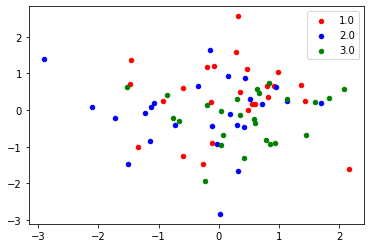


For d = 30:


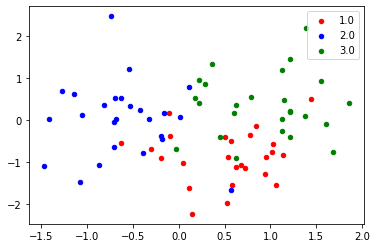


For d = 60:


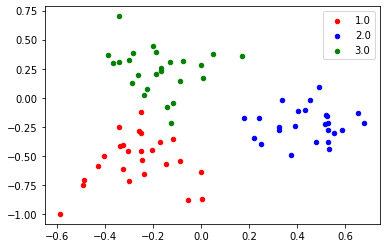


For d = 73:


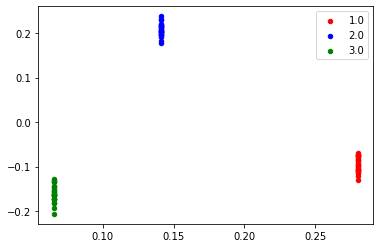


For d = 74:


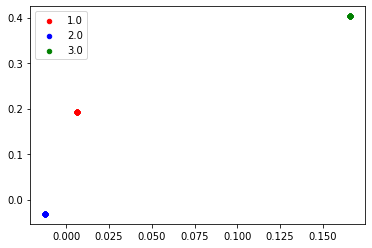


For d = 75:


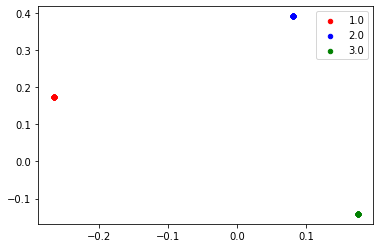

In [ ]:
np.random.seed(42)
D = [5, 30, 60, 73, 74, 75]

for d in D:
  #randn() as all have zero mean & unit covariance
  C1 = np.random.randn(25, d)
  C2 = np.random.randn(25, d)
  C3 = np.random.randn(25, d)

  X = np.concatenate((C1, C2, C3), axis=0)
  Y = np.concatenate((1*np.ones(25), 2*np.ones(25), 3*np.ones(25)))
  
  W, Z = LDAFeature(X, Y) # generate LDA embedding

  # plot result
  print('\nFor d = {}:'.format(d))

  cdict = {1: 'red', 2: 'blue', 3: 'green'}
  fig, ax = plt.subplots()
  for g in np.unique(Y):
      ix = np.where(Y == g)
      ax.scatter(Z[:,0][ix], Z[:,1][ix], c = cdict[g], label = g, s = 20)
  ax.legend()
  plt.show()

*Given how the three classes are distributed, what do you expect as a result of LDA? What do you observe in your experiment? What could be the reason for the different behavior of the result depending on the number of dimensions? (Think about the result from b.)*

As all the data points of the tree classes are independent and identically distributed (normal distribution with zero mean and unit covariance), we expect that the data points are overlapping to a large extent (due to similar class means and variances). Therefore, it becomes difficult for the LDA to find a good projection line. As the number of dimensions increases, it gets easier for the algorithm to find the optimal projections due to more degrees of freedom and the classes might get better seperated.

This is also what we observe: first, the classes are mainly overlapping and as d increases, the LDA algorithm can better distinguish the three classes. At d = 75, all data points are even projected to a single point per class in two dimensions.

The reason for the different behaviour of the LDA depending on d might be explained with the VC dimension of the linear model underyling LDA, specifically, the decision hyperplane. From b), we know that the VC dimension of a linear classifier is d + 1. The multi-class problem can be converted into three binary one-vs-all problems. Hence, as we have n = 3*25 = 75 data points, we need d = 74 such that all points are shattered. This is also exactly the number of dimensions (d = 74) from which on all points of one class are projected onto a single point (see plots and proof above). As d increases from five to 75, LDA can better seperate the classes as more free effective parameters can be used. Hence, it can better seperate the classes by  projecting the points on the two (generalized) eigenvectors with the largest eigenvalues.

# **Part d)**

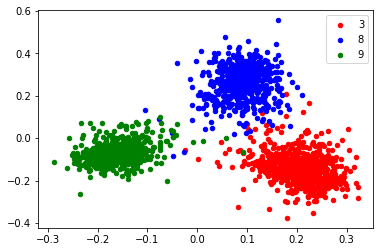

In [ ]:
# apply LDA to the supplied data from the USPS dataset
W, Z = LDAFeature(X_train, Y_train)

cdict = {3: 'red', 8: 'blue', 9: 'green'}
fig, ax = plt.subplots()
for g in np.unique(Y_train):
    ix = np.where(Y_train == g)
    ax.scatter(Z[:,0][ix], Z[:,1][ix], c = cdict[g], label = g, s = 20)
ax.legend()
plt.show()

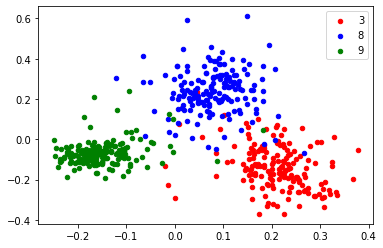

In [ ]:
# embedding the test data using the learned projection with true label as color
Z_test = X_test@W

cdict = {3: 'red', 8: 'blue', 9: 'green'}
fig, ax = plt.subplots()
for g in np.unique(Y_test):
    ix = np.where(Y_test == g)
    ax.scatter(Z_test[:,0][ix], Z_test[:,1][ix], c = cdict[g], label = g, s = 20)
ax.legend()
plt.show()

*How do you judge this result ? Does the embedding generalize (written answer on paper) ?*

Given the good performance of the trained embeddings on the test set, it seems that they generalize as the three classes are only marginally oberlapping (similar to the performance on the training set).
This is reasonable assuming that the test data was sampled from the same class distributions as the training data. Hence, the learned embeddings also project the test data in a good way.